In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
# Load the Breast Cancer dataset from sklearn (no internet required)

In [4]:
print(data.keys())
# Show main components of the dataset (data, target, feature names, description)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
# Convert numerical array to a DataFrame for better readability

df.head()
# Display the first 5 rows of the dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape
# Number of samples (rows) and features (columns)

(569, 30)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Initialize the scaler (mean=0, std=1)

X_scaled = scaler.fit_transform(df)
# Scale features to avoid bias in distance-based clustering


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
# Create KMeans model assuming 2 natural clusters

In [9]:
clusters = kmeans.fit_predict(X_scaled)
# Fit the model and assign each sample to a cluster

In [10]:
df["Cluster"] = clusters
# Store cluster assignments alongside original data

df.head()
# View data with assigned cluster labels

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


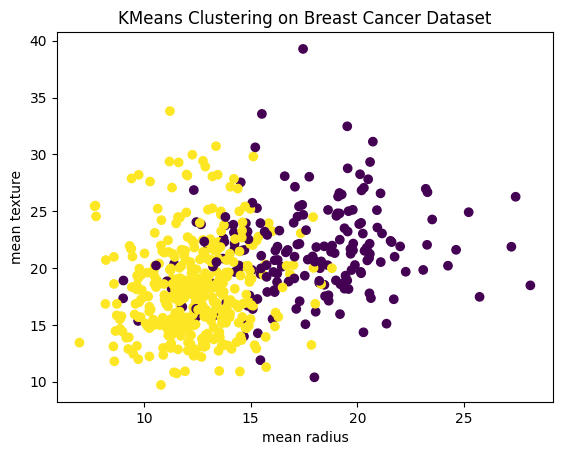

In [11]:
import matplotlib.pyplot as plt

plt.scatter(
    df.iloc[:, 0],   # First feature
    df.iloc[:, 1],   # Second feature
    c=clusters       # Color points by cluster
)

plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KMeans Clustering on Breast Cancer Dataset")
plt.show()
# Visualize how data points are clustered in 2D space


In [12]:
pd.crosstab(data.target, clusters)
# Compare clusters with true labels (for analysis only, not training)


col_0,0,1
row_0,,
0,175,37
1,13,344


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# کاهش داده‌ها به 2 بعد برای رسم نمودار


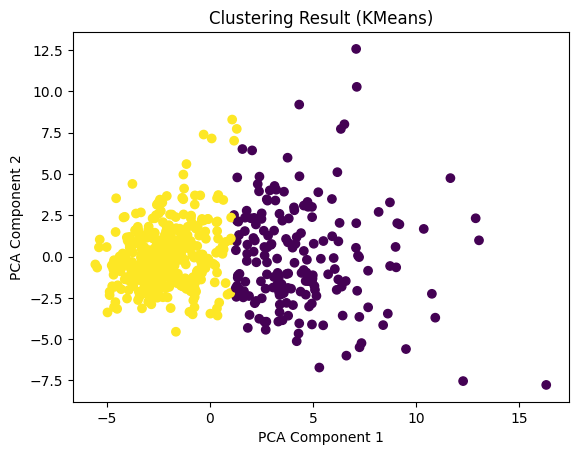

In [14]:
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=clusters,
    cmap="viridis"
)
plt.title("Clustering Result (KMeans)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
# نمایش خوشه‌ها بعد از کاهش بُعد


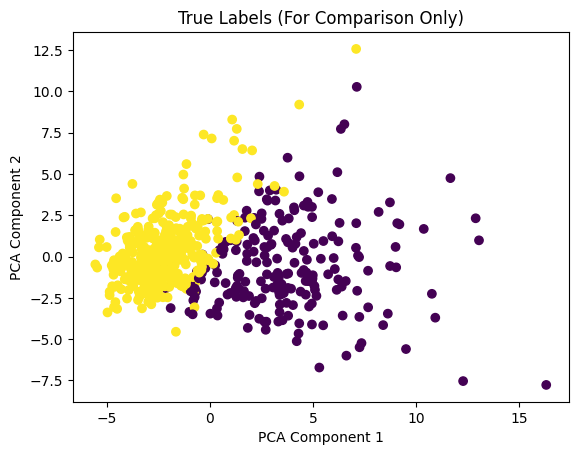

In [15]:
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=data.target,
    cmap="viridis"
)
plt.title("True Labels (For Comparison Only)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
# نمایش برچسب‌های واقعی برای مقایسه چشمی


In [16]:
import numpy as np

mapped_clusters = np.where(clusters == 0, 0, 1)
# فرض: Cluster 0 ≈ Target 0


In [17]:
errors = mapped_clusters != data.target
# True یعنی این نمونه اشتباه خوشه‌بندی شده


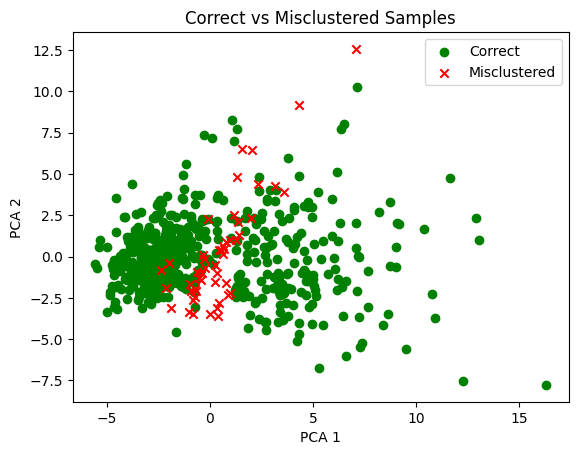

In [18]:
plt.scatter(
    X_pca[~errors, 0],
    X_pca[~errors, 1],
    c="green",
    label="Correct"
)

plt.scatter(
    X_pca[errors, 0],
    X_pca[errors, 1],
    c="red",
    marker="x",
    label="Misclustered"
)

plt.legend()
plt.title("Correct vs Misclustered Samples")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
